In [1]:
################################  Storage_Optimization.ipynb  ####################################
# Author: Sukhendu Sain
# Description: Main file of codebase. Houses main code
# Data: 23-Nov-2024
#################################################################################

In [3]:
# Import Necessary Libraries, Utils, and Config Files
import utils
from config import *
import pandas as pd
import os
import matplotlib.pyplot as plt
# import importlib
# importlib.reload(utils)

### Config - Parameters/Other Variables/File Paths

In [4]:
## Files Path ##
ROOT_FILE_PATH = '\\'.join(os.getcwd().split('\\')[:-1])

AKINS_FOMO_FILE_PATH = os.path.join(ROOT_FILE_PATH, r"Data&Files\AKINS FoMoCo_Piece_Sales_112222_YTD.xlsx")
GPARTS_FILE_PATH = os.path.join(ROOT_FILE_PATH, r"Data&Files\GPARTS Part Measures.xlsx")
WHOLESALE_FILE_PATH = os.path.join(ROOT_FILE_PATH, r"Data&Files\Wholesale JAN_Oct_Parts_Ranking_Counter_Invoices_All_Brands.xlsx")
SERVICE_FILE_PATH = os.path.join(ROOT_FILE_PATH, r"Data&Files\Service JAN_Oct_Parts_Ranking_ROs_All_Brands.xlsx")
COUNTERPAD_FILE_PATH = os.path.join(ROOT_FILE_PATH, r"Data&Files\Counter_Pad_11142024.xlsx")



## Variables
print_df_after_import = False
print_df_data_analyse = False

# Data Import and Clean

In [5]:
#### Read FILE:: (AKINS FoMoCo_Piece_Sales_112222_YTD.xlsx) into Dataframe
df_Akins = utils.read_excel(AKINS_FOMO_FILE_PATH)
if print_df_after_import: utils.print_df(df_Akins) # Print the Dataframe

In [6]:
#### Read FILE:: (GPARTS Part Measures.xlsx) into Dataframe
df_Gparts = utils.read_excel(GPARTS_FILE_PATH)
if print_df_after_import: utils.print_df(df_Gparts) # Print the Dataframe

In [7]:
#### Read FILE:: (Wholesale JAN_Oct_Parts_Ranking_Counter_Invoices_All_Brands.xlsx) into Dataframe
df_Wholesale = utils.read_excel(WHOLESALE_FILE_PATH)

# Clean the Wholesale Dataframe
df_Wholesale = df_Wholesale.drop(columns=[col for col in df_Wholesale.columns if 'Unnamed' in col], inplace=False)
df_Wholesale_Ford = df_Wholesale[df_Wholesale['Vendor'] == 'FOR'] # Put only 'Ford' Brand Data into another DF

if print_df_after_import: utils.print_df(df_Wholesale_Ford) # Print the Dataframe

In [9]:
#### Read FILE:: (Service JAN_Oct_Parts_Ranking_ROs_All_Brands.xlsx) into Dataframe
df_Service = utils.read_excel(SERVICE_FILE_PATH)

# Clean the Service Dataframe
df_Service = df_Service.drop(columns=[col for col in df_Service.columns if 'Unnamed' in col], inplace=False)
df_Service_Ford = df_Service[df_Service['Vendor'] == 'FOR'] # Put only 'Ford' Brand Data into another DF

if print_df_after_import: utils.print_df(df_Service_Ford, 100) # Print the Dataframe

In [11]:
#### Read FILE:: (Counter Pad) into Dataframe

# Data Analysis


Active Parts: 212530; Active Percentage: 91.55053953348123%
Not Active Parts: 19615; Not Active Percentage: 8.449460466518772%


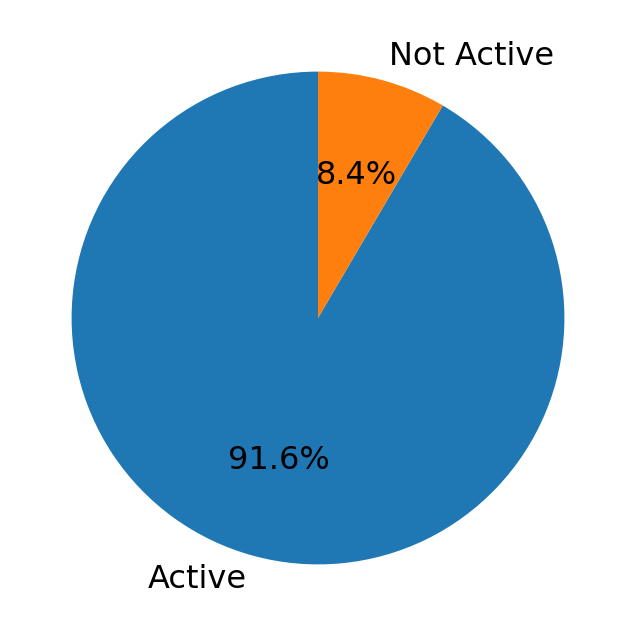

In [12]:
## Analyze 'Active' Column of GParts
total_rows = df_Gparts.shape[0]
active = df_Gparts[df_Gparts["Is Active?"] == 'Yes'].shape[0]
active_percent = ( df_Gparts[df_Gparts["Is Active?"] == 'Yes'].shape[0]/total_rows ) * 100

# Print the Counts/Percentage
print(f"Active Parts: {active}; Active Percentage: {active_percent}%")
print(f"Not Active Parts: {total_rows - active}; Not Active Percentage: {100 - active_percent}%")

# Visualize
labels = ['Active', 'Not Active'] # Create labels and sizes for the pie chart
sizes = [active_percent, 100 - active_percent]

plt.figure(figsize=(10, 8)) # Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 23})

plt.show() # Show the chart

In [14]:
## Find Rows with 0 in either Dimensions
# Depth (Column Here) = Length (In Docs)

# Count no. of Rows with 0 in either Dimensions; no_all share count with other 3
no_depth = df_Gparts[df_Gparts["Prod Att - Length"] == 0].shape[0]
no_width = df_Gparts[df_Gparts["Prod Att- Width"] == 0].shape[0]
no_height = df_Gparts[df_Gparts["Prod Att - Height"] == 0].shape[0]
no_all = df_Gparts[(df_Gparts["Prod Att - Height"] == 0) & (df_Gparts["Prod Att- Width"] == 0) & (df_Gparts["Prod Att - Length"] == 0)].shape[0]

# Calculate percentages
total_rows = df_Gparts.shape[0]
percent_no_depth = (no_depth / total_rows) * 100
percent_no_width = (no_width / total_rows) * 100
percent_no_height = (no_height / total_rows) * 100
percent_no_all = (no_all / total_rows) * 100

# Count 'Active' Parts having No Dimensions and Dimensions
No_Dim_Active = df_Gparts[(df_Gparts["Prod Att - Height"] == 0) & (df_Gparts["Is Active?"] == 'Yes')].shape[0]
No_Dim_Not_Active = df_Gparts[(df_Gparts["Prod Att - Height"] == 0) & (df_Gparts["Is Active?"] == 'No')].shape[0]
No_Dim_Active_Percent = (No_Dim_Active/no_all) * 100
No_Dim_Not_Active_Percent = (No_Dim_Not_Active/no_all) * 100
With_Dim_Active = df_Gparts[(df_Gparts["Prod Att - Height"] != 0) & (df_Gparts["Is Active?"] == 'Yes')].shape[0]
With_Dim_Not_Active = df_Gparts[(df_Gparts["Prod Att - Height"] != 0) & (df_Gparts["Is Active?"] == 'No')].shape[0]
With_Dim_Active_Percent = (With_Dim_Active/(total_rows - no_all)) * 100
With_Dim_Not_Active_Percent = (With_Dim_Not_Active/(total_rows - no_all)) * 100

# Print the Counts/Percentages
print(f"No Length/Depth: {round(no_depth/total_rows*100, 2)}%; No Width: {round(no_width/total_rows*100, 2)}%; No Height: {round(no_height/total_rows*100, 2)}%; No Dimensions: {round(percent_no_all, 2)}%;")
print(f"Active Parts of No Dimensions: {No_Dim_Active}; Percentage with respect to Parts without Dims: {round(No_Dim_Active_Percent, 2)}%")
print(f"Not Active Parts of No Dimensions: {No_Dim_Not_Active}; Percentage with respect to Parts without Dims: {round(No_Dim_Not_Active_Percent, 2)}%")
print(f"Active Parts with Dimensions: {With_Dim_Active}; Percentage with respect to Parts with Dims: {round(With_Dim_Active_Percent, 2)}%")
print(f"Not Active Parts with Dimensions: {With_Dim_Not_Active}; Percentage with respect to Parts with Dims: {round(With_Dim_Not_Active_Percent, 2)}%")

# Here we find out that a row, if containing 0 in 1 dimension, has 0 in all, or
# A row has either all or none dimensions
# 16% of Rows has 0 Dimensions

No Length/Depth: 16.5%; No Width: 16.5%; No Height: 16.5%; No Dimensions: 16.5%;
Active Parts of No Dimensions: 36947; Percentage with respect to Parts without Dims: 96.48%
Not Active Parts of No Dimensions: 1347; Percentage with respect to Parts without Dims: 3.52%
Active Parts with Dimensions: 175583; Percentage with respect to Parts with Dims: 90.58%
Not Active Parts with Dimensions: 18268; Percentage with respect to Parts with Dims: 9.42%


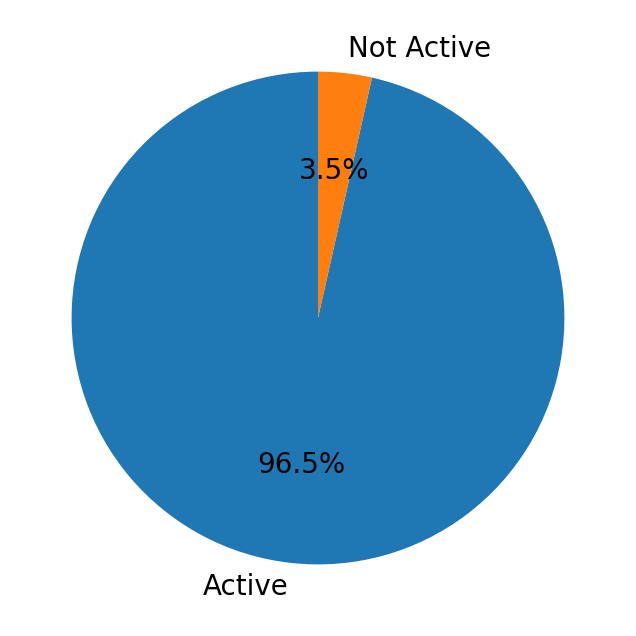

In [16]:
# Visualize
labels = ['Active', 'Not Active'] # Create labels and sizes for the pie chart
sizes = [No_Dim_Active_Percent, No_Dim_Not_Active_Percent]

plt.figure(figsize=(10, 8)) # Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 20})

plt.show() # Show the chart

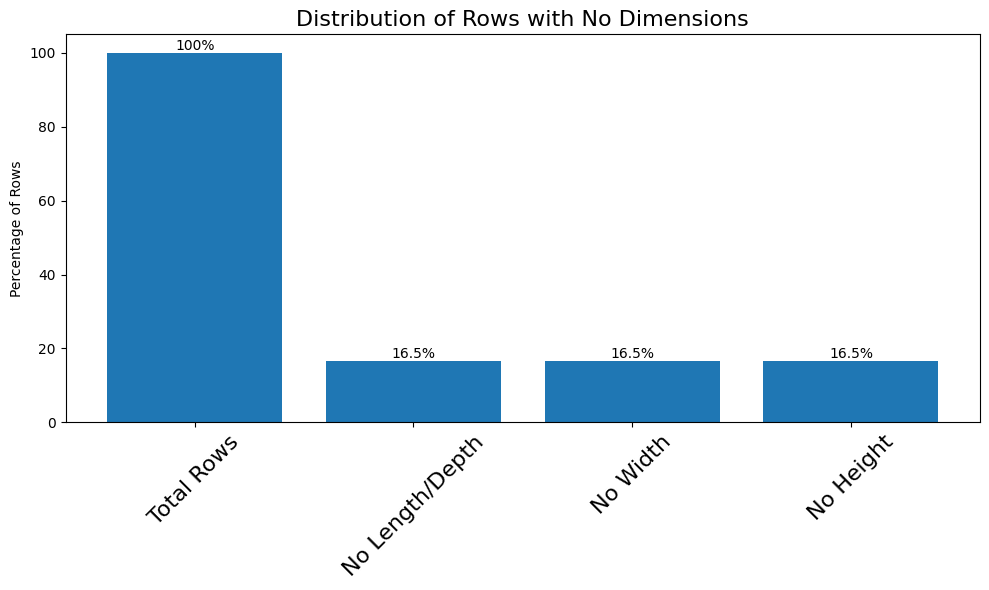

In [ ]:
## Visualize above No Dimensions Data

# Create the bar graph
plt.figure(figsize=(10, 6)) 
bars = ['Total Rows', 'No Length/Depth', 'No Width', 'No Height']
heights = [100, percent_no_depth, percent_no_width, percent_no_height]

plt.bar(bars, heights)
plt.title(f'Distribution of Rows with No Dimensions', fontsize=16)
plt.ylabel('Percentage of Rows')
plt.xticks(rotation=45, fontsize=16)

# Add labels to each bar
for i, v in enumerate(heights):
    plt.text(i, v, str(round(v, 2)) + '%', ha='center', va='bottom')

# Show the legend and display the chart
plt.tight_layout()
plt.show()

In [ ]:
## Find Number of Matching Part Numbers in each of the Dataframe

# The Dataframes to match
all_dfs = [df_Wholesale_Ford, df_Gparts]

# Part# Column Name of each DF
part_number_columns = ['Part Number', 'Svc Part Number']

# Find common part numbers
common_part_numbers = set(all_dfs[0][part_number_columns[0]])
for i in range(1, len(all_dfs)):
    common_part_numbers &= set(all_dfs[i][part_number_columns[i]])

print(f"Part numbers common to all DataFrames: {len(common_part_numbers)}")
if print_df_data_analyse: utils.print_df(df_Wholesale_Ford[df_Wholesale_Ford["Part Number"].isin(common_part_numbers)], 100)

# Data Processing & Calculation

In [ ]:
## Make a Big Final Dataframe
# It will have the Columns - 'Part Number', 'Vendor', 'Sold (Pcs.)', 'Length/Depth', 'Width', 'Height', 'Zone', 'Storage Type', 'Sub Storage', 'Number of Storage needed'
# It will have all the rows

In [ ]:
data = []
sum = 0
totalSoldPCs = int(df_Wholesale_Ford["Total Sold"].sum())
print(sum, totalSoldPCs)
for i in range(df_Wholesale_Ford.shape[0]):
    zone = ""
    if sum/totalSoldPCs <= 0.2:
        zone = "Red Hot Zone"
    if sum/totalSoldPCs > 0.2 and sum/totalSoldPCs <= 0.4:
        zone = "Orange Zone"
    if sum/totalSoldPCs > 0.4 and sum/totalSoldPCs <= 0.6:
        zone = "Yellow Zone"
    if sum/totalSoldPCs > 0.6 and sum/totalSoldPCs <= 0.8:
        zone = "Green Zone"
    if sum/totalSoldPCs > 0.8:
        zone = "Blue Zone"
    data.append([df_Wholesale_Ford["Part Number"].iloc[i], zone, sum])
    sum = sum + df_Wholesale_Ford["Total Sold"].iloc[i]
df_zones = pd.DataFrame(data)
utils.print_df(df_zones,None)

with open("htt.txt", "w") as f:
    f.write(df_zones.to_string())